<a href="https://colab.research.google.com/github/BoWarburton/DS-Unit-1-Sprint-2-Statistics/blob/master/DS_Unit_1_Sprint_Challenge_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science Unit 1 Sprint Challenge 2

## Exploring Data, Testing Hypotheses

In this sprint challenge you will look at a dataset of people being approved or rejected for credit.

https://archive.ics.uci.edu/ml/datasets/Credit+Approval

Data Set Information: This file concerns credit card applications. All attribute names and values have been changed to meaningless symbols to protect confidentiality of the data. This dataset is interesting because there is a good mix of attributes -- continuous, nominal with small numbers of values, and nominal with larger numbers of values. There are also a few missing values.

Attribute Information:
- A1: b, a.
- A2: continuous.
- A3: continuous.
- A4: u, y, l, t.
- A5: g, p, gg.
- A6: c, d, cc, i, j, k, m, r, q, w, x, e, aa, ff.
- A7: v, h, bb, j, n, z, dd, ff, o.
- A8: continuous.
- A9: t, f.
- A10: t, f.
- A11: continuous.
- A12: t, f.
- A13: g, p, s.
- A14: continuous.
- A15: continuous.
- A16: +,- (class attribute)

Yes, most of that doesn't mean anything. A16 is a variable that indicates whether or not a person's request for credit has been approved or denied. This is a good candidate for a y variable since we might want to use the other features to predict this one. The remaining variables have been obfuscated for privacy - a challenge you may have to deal with in your data science career.

Sprint challenges are evaluated based on satisfactory completion of each part. It is suggested you work through it in order, getting each aspect reasonably working, before trying to deeply explore, iterate, or refine any given step. Once you get to the end, if you want to go back and improve things, go for it!

## Part 1 - Load and validate the data

- Load the data as a `pandas` data frame.
- Validate that it has the appropriate number of observations (you can check the raw file, and also read the dataset description from UCI).
- UCI says there should be missing data - check, and if necessary change the data so pandas recognizes it as na
- Make sure that the loaded features are of the types described above (continuous values should be treated as float), and correct as necessary

This is review, but skills that you'll use at the start of any data exploration. Further, you may have to do some investigation to figure out which file to load from - that is part of the puzzle.

In [0]:
import pandas as pd
import numpy as np

In [4]:
# LOOKED AT THE DATASETS AND DETERMINED THAT THE ONE I WANT IS CRX.DATA
!curl https://archive.ics.uci.edu/ml/machine-learning-databases/credit-screening/crx.data


b,30.83,0,u,g,w,v,1.25,t,t,01,f,g,00202,0,+
a,58.67,4.46,u,g,q,h,3.04,t,t,06,f,g,00043,560,+
a,24.50,0.5,u,g,q,h,1.5,t,f,0,f,g,00280,824,+
b,27.83,1.54,u,g,w,v,3.75,t,t,05,t,g,00100,3,+
b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+
b,32.08,4,u,g,m,v,2.5,t,f,0,t,g,00360,0,+
b,33.17,1.04,u,g,r,h,6.5,t,f,0,t,g,00164,31285,+
a,22.92,11.585,u,g,cc,v,0.04,t,f,0,f,g,00080,1349,+
b,54.42,0.5,y,p,k,h,3.96,t,f,0,f,g,00180,314,+
b,42.50,4.915,y,p,w,v,3.165,t,f,0,t,g,00052,1442,+
b,22.08,0.83,u,g,c,h,2.165,f,f,0,t,g,00128,0,+
b,29.92,1.835,u,g,c,h,4.335,t,f,0,f,g,00260,200,+
a,38.25,6,u,g,k,v,1,t,f,0,t,g,00000,0,+
b,48.08,6.04,u,g,k,v,0.04,f,f,0,f,g,00000,2690,+
a,45.83,10.5,u,g,q,v,5,t,t,07,t,g,00000,0,+
b,36.67,4.415,y,p,k,v,0.25,t,t,10,t,g,00320,0,+
b,28.25,0.875,u,g,m,v,0.96,t,t,03,t,g,00396,0,+
a,23.25,5.875,u,g,q,v,3.17,t,t,10,f,g,00120,245,+
b,21.83,0.25,u,g,d,h,0.665,t,f,0,t,g,00000,0,+
a,19.17,8.585,u,g,cc,h,0.75,t,t,07,f,g,00096,0,+
b,25.00,11.25,u,g,c,v,2.5,t,t,17,f,g,00200,1208,+
b,23

In [5]:
# Load in the correct dataset
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/credit-screening/crx.data')
df.head()

,b,30.83,0,u,g,w,v,1.25,t,t.1,01,f,g.1,00202,0.1,+
0,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
1,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
2,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
3,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+
4,b,32.08,4.000,u,g,m,v,2.50,t,f,0,t,g,00360,0,+


In [6]:
# Validate number of observations, missing values, and feature types
df.describe()

,0,1.25,01,0.1
count,689.000000,689.000000,689.000000,689.000000
mean,4.765631,2.224819,2.402032,1018.862119
std,4.978470,3.348739,4.866180,5213.743149
min,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.165000,0.000000,0.000000
50%,2.750000,1.000000,0.000000,5.000000
75%,7.250000,2.625000,3.000000,396.000000
max,28.000000,28.500000,67.000000,100000.000000


In [7]:
# We see that '?' is used to represent missing value
# So load in the dataset again, this time
# setting column names and replacing '?' with null value

dnames = ['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'A11', 'A12', 'A13', 'A14', 'A15', 'A16']
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/credit-screening/crx.data', names=dnames, na_values='?')
df.tail(50)


,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
640,b,34.17,2.750,u,g,i,bb,2.500,f,f,0,t,g,232.0,200,-
641,NaN,33.17,2.250,y,p,cc,v,3.500,f,f,0,t,g,200.0,141,-
642,b,31.58,0.750,y,p,aa,v,3.500,f,f,0,t,g,320.0,0,-
643,a,52.50,7.000,u,g,aa,h,3.000,f,f,0,f,g,0.0,0,-
644,b,36.17,0.420,y,p,w,v,0.290,f,f,0,t,g,309.0,2,-
645,b,37.33,2.665,u,g,cc,v,0.165,f,f,0,t,g,0.0,501,-
646,a,20.83,8.500,u,g,c,v,0.165,f,f,0,f,g,0.0,351,-
647,b,24.08,9.000,u,g,aa,v,0.250,f,f,0,t,g,0.0,0,-
648,b,25.58,0.335,u,g,k,h,3.500,f,f,0,t,g,340.0,0,-
649,a,35.17,3.750,u,g,ff,ff,0.000,f,t,6,f,g,0.0,200,-


In [8]:
df.shape

(690, 16)

In [9]:
# Now check again, documentation says there are 12 missing values in A1, 6 in A4, etc.
df.isnull().sum()

A1     12
A2     12
A3      0
A4      6
A5      6
A6      9
A7      9
A8      0
A9      0
A10     0
A11     0
A12     0
A13     0
A14    13
A15     0
A16     0
dtype: int64

In [10]:
df.dtypes

A1      object
A2     float64
A3     float64
A4      object
A5      object
A6      object
A7      object
A8     float64
A9      object
A10     object
A11      int64
A12     object
A13     object
A14    float64
A15      int64
A16     object
dtype: object

In [11]:
# Need to make these changes so that loaded featurese are of the types described
# with continuous values treated as float. According to the instructions,
# A11, A14, and A15 should be float, not int.

# Function to make that change (with quick test)
def int_to_float(cell_contents):
  return float(cell_contents)
int_to_float(df['A11'][22])

6.0

In [0]:
# Apply the function
df['A11'] = df['A11'].apply(int_to_float)

In [13]:
# Verify that all columns have the correct datatype
df.dtypes

A1      object
A2     float64
A3     float64
A4      object
A5      object
A6      object
A7      object
A8     float64
A9      object
A10     object
A11    float64
A12     object
A13     object
A14    float64
A15      int64
A16     object
dtype: object

## Part 2 - Exploring data, Testing hypotheses

The only thing we really know about this data is that A16 is the class label. Besides that, we have 6 continuous (float) features and 9 categorical features.

Explore the data: you can use whatever approach (tables, utility functions, visualizations) to get an impression of the distributions and relationships of the variables. In general, your goal is to understand how the features are different when grouped by the two class labels (`+` and `-`).

For the 6 continuous features, how are they different when split between the two class labels? Choose two features to run t-tests (again split by class label) - specifically, select one feature that is *extremely* different between the classes, and another feature that is notably less different (though perhaps still "statistically significantly" different). You may have to explore more than two features to do this.

For the categorical features, explore by creating "cross tabs" (aka [contingency tables](https://en.wikipedia.org/wiki/Contingency_table)) between them and the class label, and apply the Chi-squared test to them. [pandas.crosstab](http://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.crosstab.html) can create contingency tables, and [scipy.stats.chi2_contingency](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2_contingency.html) can calculate the Chi-squared statistic for them.

There are 9 categorical features - as with the t-test, try to find one where the Chi-squared test returns an extreme result (rejecting the null that the data are independent), and one where it is less extreme.

**NOTE** - "less extreme" just means smaller test statistic/larger p-value. Even the least extreme differences may be strongly statistically significant.

Your *main* goal is the hypothesis tests, so don't spend too much time on the exploration/visualization piece. That is just a means to an end - use simple visualizations, such as boxplots or a scatter matrix (both built in to pandas), to get a feel for the overall distribution of the variables.

This is challenging, so manage your time and aim for a baseline of at least running two t-tests and two Chi-squared tests before polishing. And don't forget to answer the questions in part 3, even if your results in this part aren't what you want them to be.

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


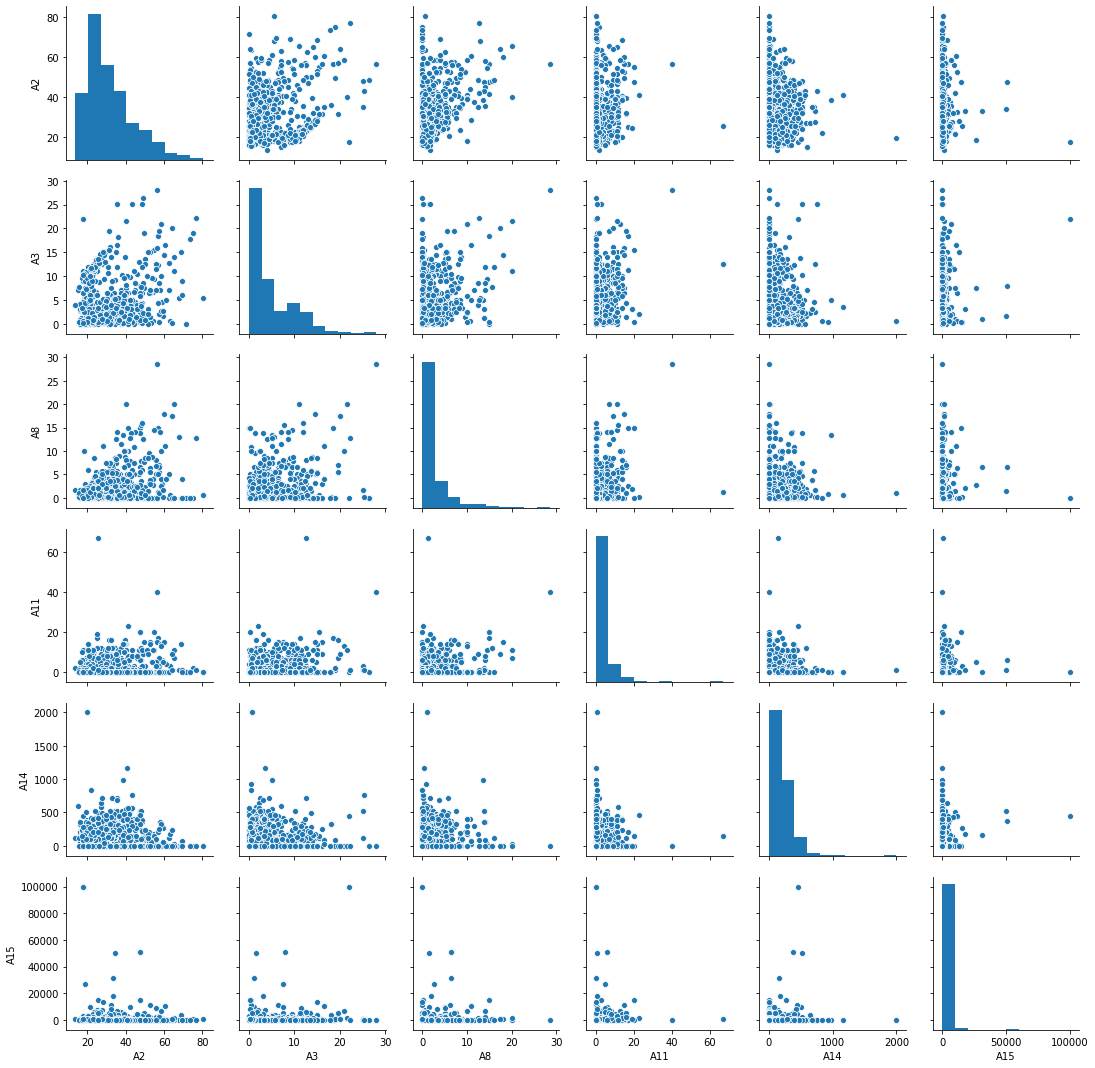

In [14]:
# Take a quick look with seaborn
import seaborn
seaborn.pairplot(df)

In [0]:
# Make two dataframes, one for each class label (+ and -)
df_yes = df[df['A16']=='+']
df_no = df[df['A16']=='-']

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
70,b,32.33,7.5,u,g,e,bb,1.585,t,f,0,t,s,00420,0,-
71,b,34.83,4.0,u,g,d,bb,12.500,t,f,0,t,g,?,0,-
72,a,38.58,5.0,u,g,cc,v,13.500,t,f,0,t,g,00980,0,-
73,b,44.25,0.5,u,g,m,v,10.750,t,f,0,f,s,00400,0,-
74,b,44.83,7.0,y,p,c,v,1.625,f,f,0,f,g,00160,2,-


In [0]:
# The null hypotheses are that A16 is independent with respect
# to continuous variables A3, A8, A11, and A15.
# The alternative hypotheses state that the differences in the mean values
# of A3, A8, etc., in "yes" and "no" dataframes are partly due
# to A3, A8, etc., and not the result of random chance, given a certain
# level of confidence such as 95% sure.
# The direction of the influnce, is given by whether the mean value
# is higher or lower between the "yes" and "no" tables.

# I am going to look at the mean values of several variables
# in the 'yes' table compared to the 'no' table and run t-tests
from scipy import stats

In [0]:
print('A3 yes mean:', df_yes['A3'].mean())
print('A3 no mean:', df_no['A3'].mean())
print('A3 ttest results:\n', stats.ttest_ind(df_yes['A3'], df_no['A3']))
# Null hypothesis: A3 has no effect on A16
# Due to a t-stat of 5.53 and a p-value of 0 I reject the null hypothesis
# A higher number in A3 tends to increase the chance of getting a loan.

A3 yes mean: 5.904951140065144
A3 no mean: 3.839947780678851
A3 ttest results:
 Ttest_indResult(statistic=5.52998337614816, pvalue=4.551680702308068e-08)


In [0]:
print('A8 yes mean:', df_yes['A8'].mean())
print('A8 no mean:', df_no['A8'].mean())
print('A8 ttest results:\n', stats.ttest_ind(df_yes['A8'], df_no['A8']))
# Null hypothesis: A8 has no effect on A16
# Due to a t-stat of 8.94 and a p-value of 0 I reject the null hypothesis
# A higher number in A8 tends to increase the chance of getting a loan.

A8 yes mean: 3.427899022801302
A8 no mean: 1.2579242819843346
A8 ttest results:
 Ttest_indResult(statistic=8.935819983773698, pvalue=3.6710537401601785e-18)


In [0]:
print('A11 yes mean:', df_yes['A11'].mean())
print('A11 no mean:', df_no['A11'].mean())
print('A11 ttest results:\n', stats.ttest_ind(df_yes['A11'], df_no['A11']))
# Null hypothesis: A11 has no effect on A16
# Due to a t-stat of 11.67 and a p-value of 0 I reject the null hypothesis
# A higher number in A11 tends to increase the chance of getting a loan.

A11 yes mean: 4.605863192182411
A11 no mean: 0.6318537859007833
A11 ttest results:
 Ttest_indResult(statistic=11.667004222431277, pvalue=7.957718568079967e-29)


In [0]:
print('A15 yes mean:', df_yes['A15'].mean())
print('A15 no mean:', df_no['A15'].mean())
print('A15 ttest results:\n', stats.ttest_ind(df_yes['A15'], df_no['A15']))
# Null hypothesis: A15 has no effect on A16
# Due to a t-stat of 4.68 and a p-value of 0 I reject the null hypothesis
# (although this is the highest of all the p-values, it's still pretty low)
# A higher number in A15 tends to increase the chance of getting a loan.

A15 yes mean: 2038.85993485342
A15 no mean: 198.60574412532637
A15 ttest results:
 Ttest_indResult(statistic=4.680216020964486, pvalue=3.4520256956287944e-06)


In [0]:
# For the categorical features, create crosstabs
# between them and the class label A16
# Try categorical features A1, A4, A6, A10, A12
contingency_a1 = pd.crosstab(df['A16'], df['A1'])
contingency_a1

A1,?,a,b
A16,,,
+,3,98,206
-,9,112,262


In [0]:
contingency_a4 = pd.crosstab(df['A16'], df['A4'])
contingency_a4

A4,?,l,u,y
A16,,,,
+,4,2,256,45
-,2,0,263,118


In [0]:
contingency_a6 = pd.crosstab(df['A16'], df['A6'])
contingency_a6

A6,?,aa,c,cc,d,e,ff,i,j,k,m,q,r,w,x
A16,,,,,,,,,,,,,,,
+,4,19,62,29,7,14,7,14,3,14,16,51,2,33,32
-,5,35,75,12,23,11,46,45,7,37,22,27,1,31,6


In [0]:
contingency_a10 = pd.crosstab(df['A10'], df['A10'])
contingency_a10

A10,f,t
A10,,
f,395,0
t,0,295


In [0]:
# contingency_a12 = pd.crosstab(df['A12'], df['A2'])
# contingency_a12

In [0]:
# Chi-square test
#
# Based on eyeballing the crosstabs, it looks like A1 is independent
# with regard to A16 (i.e. I expect to fail to reject the null hypothesis).
# But it looks like A4 and especially A10 might influence A16 significantly.
#
# Null hypothesis: value of A1 does not affect value of A16
chi2, p_value, dof, expected = stats.chi2_contingency(contingency_a1)
print('A1:')
print("Chi^2 Statistic", chi2)
print("Degrees of Freedom:", dof)
print("P-value:", p_value)
# Based on p-value of .318 and chi^2 statistic of 2.29, I fail to reject
# the null hypothesis that A1 has no effect on A16

A1:
Chi^2 Statistic 2.2909673396997023
Degrees of Freedom: 2
P-value: 0.3180700396919805


In [0]:
# Null hypothesis: value of A4 does not affect value of A16
chi2, p_value, dof, expected = stats.chi2_contingency(contingency_a4)
print('A4:')
print("Chi^2 Statistic", chi2)
print("Degrees of Freedom:", dof)
print("P-value:", p_value)
# Based on p-value of 0 and chi^2 statistic of 27.4, I reject
# the null hypothesis that A4 has no effect on A16

A4:
Chi^2 Statistic 27.415923419169303
Degrees of Freedom: 3
P-value: 4.816178195213086e-06


In [0]:
# Null hypothesis: value of A10 does not affect value of A16
chi2, p_value, dof, expected = stats.chi2_contingency(contingency_a10)
print('A10:')
print("Chi^2 Statistic", chi2)
print("Degrees of Freedom:", dof)
print("P-value:", p_value)
# Based on p-value of 0 and chi^2 statistic of 685.9, I reject
# the null hypothesis that A10 has no effect on A16

A10:
Chi^2 Statistic 685.9202300252323
Degrees of Freedom: 1
P-value: 3.4473623006434284e-151


## Part 3 - Analysis and Interpretation

Now that you've looked at the data, answer the following questions:

- Interpret and explain the two t-tests you ran - what do they tell you about the relationships between the continuous features you selected and the class labels?
- Interpret and explain the two Chi-squared tests you ran - what do they tell you about the relationships between the categorical features you selected and the class labels?
- What was the most challenging part of this sprint challenge?

Answer with text, but feel free to intersperse example code/results or refer to it from earlier.

## t-tests on A3, A8, A11, and A15

I ran t-tests to see if A3, A8, A11, or A15 had an effect on whether the person got a loan or not. If the value in A16 is "+", they got a loan. If A16 was "-", then they did not get a loan.

I created two dataframes to do this test, one with all the cases where the person got the loan (A16 = "+") and one where they did not (A16 = "-"). For each of the features tested, the mean value of the feature was higher in the "yes" data than in the "no" data.

The null hypothoses in each case were that the variables (whatever they meant) had no effect on whether the person got a loan, meaning that this difference in the means across the two dataframes was due to chance.

The alternative hypotheses were that as scores in A3, A8, A11, and A15 went up, the person's chance of getting the loan went up.

The results were that all three of these variables (A3, A8, A11, and A15) had a statistically significant impact on getting a loan. All of them had a significant effect on A16 with a very low p-value, meaning that we can be confident that this effect would be observed in something like 9,999 out of 1,000,000 cases at least.

A15 had the smallest t-statistic in the dataset, 4.68, and the largest p-value, 3.45e-06, which was still very small.

## Chi-square tests testing influence of A1, A4, and A10 on A16

A1 takes values of "b" and "a". There seemed to be only a small difference in whether credit was granted (A16 == '+') or denied (A16 == '-') based on the value of A1, except possibly when A1 was 'b', so it seemed worthwhile to run a chi-square test here. The null hypothesis was: values of A1 do not affect values of A16. In other words, whatever the person got on A1, that did not affect their chance of getting a loan.

Based on the results, I failed to reject the null hypothesis. The values of A1 did not seem to affect A16.

A4 takes values of "l", "u", and "y". There seemed to be some significant effect on A15, especially when A4 was "y". The null hypothesis was: values of A4 do not affect values of A16.

Based on the results, I rejected the null hypothesis. The chi-square statistic was high and the p-value was very low. The value of A4 affects the ability to get a loan.

## Most challenging part
At fist I neglected the fact that '?' was standing in for missing values. I missed this **despite the fact that Ryan covered it** but I went back and fixed it.

# Stretch Goals: 
Do these to get a 3. These are not required in order to pass the Sprint Challenge.

## Part 1: 

Make sure that all of your dataframe columns have the appropriate data types. *Hint:* If a column has the datatype of "object" even though it's made up of float or integer values, you can coerce it to act as a numeric column by using the `pd.to_numeric()` function. In order to get a 3 on this section make sure that your data exploration is particularly well commented, easy to follow, and thorough.

## Part 2:

Write functions that can calculate t-tests and chi^2 tests on all of the appropriate column combinations from the dataset. (Remember that certain tests require certain variable types.)

## Part 3: 

Calculate and report confidence intervals on your most important mean estimates (choose at least two). Make some kind of a graphic or visualization to help us see visually how precise these estimates are.

In [0]:
# You can work the stretch goals down here or back up in their regular sections
# just make sure that they are labeled so that we can easily differentiate
# your main work from the stretch goals.